# Imports and setup

### Auto-re-import python modules, useful for editing local files

In [2]:
%load_ext autoreload
%autoreload 2

## Imports

In [11]:
import itertools
import os
import warnings
from collections import Counter

import matplotlib as mpl
import numpy as np
import pandas as pd
import polars as pl
import seaborn as sns
from tqdm import tqdm

pd.options.display.max_columns = 100

mpl.rcParams["figure.max_open_warning"] = 0

# Read in data

### Read Query Metadata

In [4]:
query_metadata = pl.read_parquet(
    "s3://seanome-kmerseek/scope-benchmark/reference_files/scop.e.2.08.query_metadata.pq",
    low_memory=True,
)
query_metadata

/tmp/ipykernel_7255/3537323840.py:1: UserWarning: '(default_)region' not set; polars will try to get it from bucket

Set the region manually to silence this warning.
  query_metadata = pl.read_parquet(


query_name,query_family,query_superfamily,query_fold,query_class,n_family,n_superfamily,n_fold,n_class,query_scop_id
str,cat,cat,cat,cat,i64,i64,i64,i64,str
"""d1x3ka_ a.1.1.0 (A:) automated…","""a.1.1.0""","""a.1.1""","""a.1""","""a""",22,57,62,2644,"""d1x3ka_"""
"""d1x46a_ a.1.1.0 (A:) automated…","""a.1.1.0""","""a.1.1""","""a.1""","""a""",22,57,62,2644,"""d1x46a_"""
"""d2bk9a_ a.1.1.0 (A:) automated…","""a.1.1.0""","""a.1.1""","""a.1""","""a""",22,57,62,2644,"""d2bk9a_"""
"""d2c0ka_ a.1.1.0 (A:) automated…","""a.1.1.0""","""a.1.1""","""a.1""","""a""",22,57,62,2644,"""d2c0ka_"""
"""d2ig3a_ a.1.1.0 (A:) automated…","""a.1.1.0""","""a.1.1""","""a.1""","""a""",22,57,62,2644,"""d2ig3a_"""
…,…,…,…,…,…,…,…,…,…
"""d6y3ba_ g.96.1.0 (A:) automate…","""g.96.1.0""","""g.96.1""","""g.96""","""g""",1,2,2,722,"""d6y3ba_"""
"""d2foma1 g.96.1.1 (A:49-95) Fla…","""g.96.1.1""","""g.96.1""","""g.96""","""g""",1,2,2,722,"""d2foma1"""
"""d3s2ra_ g.97.1.0 (A:) automate…","""g.97.1.0""","""g.97.1""","""g.97""","""g""",1,1,1,722,"""d3s2ra_"""


In [5]:
# query_metadata_tidy = query_metadata.unpivot(
#     index=["query_scop_id", "query_name"],
#     on=["query_family", "query_superfamily", "query_fold", "query_class"],
# )

## Read Computed Sensitivity

In [6]:
sensitivity_folder = "/home/ec2-user/data/seanome-kmerseek/scope-benchmark/analysis-outputs/hp/01_sensitivity_until_first_false_positive"
! ls -lha $sensitivity_folder

total 3.7M
drwxr-xr-x. 2 ec2-user ec2-user  16K Nov  1 23:41 .
drwxr-xr-x. 4 ec2-user ec2-user   93 Nov  1 22:52 ..
-rw-r--r--. 1 ec2-user ec2-user 461K Nov  1 23:41 scope40.multisearch.hp.16.sensitivity_to_first_fp.pq
-rw-r--r--. 1 ec2-user ec2-user 461K Nov  1 23:23 scope40.multisearch.hp.17.sensitivity_to_first_fp.parquet
-rw-r--r--. 1 ec2-user ec2-user 461K Nov  1 23:35 scope40.multisearch.hp.17.sensitivity_to_first_fp.pq
-rw-r--r--. 1 ec2-user ec2-user 460K Nov  1 23:21 scope40.multisearch.hp.18.sensitivity_to_first_fp.parquet
-rw-r--r--. 1 ec2-user ec2-user 460K Nov  1 23:34 scope40.multisearch.hp.18.sensitivity_to_first_fp.pq
-rw-r--r--. 1 ec2-user ec2-user 720K Nov  1 23:21 scope40.multisearch.hp.19.sensitivity_to_first_fp.parquet
-rw-r--r--. 1 ec2-user ec2-user 720K Nov  1 23:33 scope40.multisearch.hp.19.sensitivity_to_first_fp.pq


In [7]:
pq = "/home/ec2-user/data/seanome-kmerseek/scope-benchmark/analysis-outputs/hp/01_sensitivity_until_first_false_positive/*pq"

sensitivity = pl.read_parquet(pq)
sensitivity = sensitivity.join(query_metadata, on="query_scop_id")
sensitivity

query_scop_id,lineage,sensitivity,sensitivity_rank,sourmash_score,moltype,ksize,query_name,query_family,query_superfamily,query_fold,query_class,n_family,n_superfamily,n_fold,n_class
str,str,f64,u32,str,str,i32,str,cat,cat,cat,cat,i64,i64,i64,i64
"""d4fvda_""","""class""",0.0,1,"""containment""","""hp""",16,"""d4fvda_ b.47.1.0 (A:) automate…","""b.47.1.0""","""b.47.1""","""b.47""","""b""",11,56,56,3059
"""d5it6a_""","""class""",0.0,2,"""containment""","""hp""",16,"""d5it6a_ b.29.1.0 (A:) automate…","""b.29.1.0""","""b.29.1""","""b.29""","""b""",42,99,99,3059
"""d2a9da2""","""class""",0.0,3,"""containment""","""hp""",16,"""d2a9da2 d.176.1.1 (A:95-343) S…","""d.176.1.1""","""d.176.1""","""d.176""","""d""",2,2,2,3653
"""d2bjxa_""","""class""",0.0,4,"""containment""","""hp""",16,"""d2bjxa_ c.47.1.2 (A:) Protein …","""c.47.1.2""","""c.47.1""","""c.47""","""c""",8,215,216,4463
"""d2b97a_""","""class""",0.0,5,"""containment""","""hp""",16,"""d2b97a_ b.138.1.1 (A:) Hydroph…","""b.138.1.1""","""b.138.1""","""b.138""","""b""",1,2,2,3059
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""d1w2la_""","""fold""",0.0,15170,"""intersect_hashes""","""hp""",19,"""d1w2la_ a.3.1.0 (A:) automated…","""a.3.1.0""","""a.3.1""","""a.3""","""a""",12,44,44,2644
"""d1l8qa1""","""fold""",0.0,15171,"""intersect_hashes""","""hp""",19,"""d1l8qa1 a.4.12.2 (A:290-399) C…","""a.4.12.2""","""a.4.12""","""a.4""","""a""",2,4,425,2644
"""d1um8a_""","""fold""",0.0,15172,"""intersect_hashes""","""hp""",19,"""d1um8a_ c.37.1.20 (A:) ClpX {H…","""c.37.1.20""","""c.37.1""","""c.37""","""c""",30,344,344,4463


In [8]:
# g = sns.relplot(
#     data=sensitivity,
#     col="sourmash_score",
#     hue="ksize",
#     row="lineage",
#     y="sensitivity",
#     x="sensitivity_rank",
#     # col_wrap=4,
#     height=3,
#     kind="line",
# )
# g.set_titles("{row_name} | {col_name}")

### Get sensitivity > 0

In [9]:
sensitivity_gr0 = sensitivity.filter(pl.col("sensitivity") > 0)
sensitivity_gr0

query_scop_id,lineage,sensitivity,sensitivity_rank,sourmash_score,moltype,ksize,query_name,query_family,query_superfamily,query_fold,query_class,n_family,n_superfamily,n_fold,n_class
str,str,f64,u32,str,str,i32,str,cat,cat,cat,cat,i64,i64,i64,i64
"""d4fvda_""","""family""",1.0,1,"""containment""","""hp""",16,"""d4fvda_ b.47.1.0 (A:) automate…","""b.47.1.0""","""b.47.1""","""b.47""","""b""",11,56,56,3059
"""d5it6a_""","""family""",1.0,2,"""containment""","""hp""",16,"""d5it6a_ b.29.1.0 (A:) automate…","""b.29.1.0""","""b.29.1""","""b.29""","""b""",42,99,99,3059
"""d2a9da2""","""family""",1.0,3,"""containment""","""hp""",16,"""d2a9da2 d.176.1.1 (A:95-343) S…","""d.176.1.1""","""d.176.1""","""d.176""","""d""",2,2,2,3653
"""d2bjxa_""","""family""",1.0,4,"""containment""","""hp""",16,"""d2bjxa_ c.47.1.2 (A:) Protein …","""c.47.1.2""","""c.47.1""","""c.47""","""c""",8,215,216,4463
"""d2b97a_""","""family""",1.0,5,"""containment""","""hp""",16,"""d2b97a_ b.138.1.1 (A:) Hydroph…","""b.138.1.1""","""b.138.1""","""b.138""","""b""",1,2,2,3059
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""d6b1pa2""","""family""",0.000224,6968,"""intersect_hashes""","""hp""",19,"""d6b1pa2 a.97.1.0 (A:300-462) a…","""a.97.1.0""","""a.97.1""","""a.97""","""a""",7,9,9,2644
"""d1k8ua_""","""family""",0.000224,6969,"""intersect_hashes""","""hp""",19,"""d1k8ua_ a.39.1.2 (A:) Calcycli…","""a.39.1.2""","""a.39.1""","""a.39""","""a""",8,73,89,2644
"""d3o4wa1""","""family""",0.000224,6970,"""intersect_hashes""","""hp""",19,"""d3o4wa1 c.55.1.0 (A:2-223) aut…","""c.55.1.0""","""c.55.1""","""c.55""","""c""",44,102,183,4463


### WRite Sensitivity > 0

In [15]:
pq_out = os.path.join(sensitivity_folder, 'sensivitity_greater_than_0', 'sensivitity_greater_than_0.pq')
! mkdir $(dirname $pq_out)
print(pq_out)
sensitivity_gr0.write_parquet(pq_out)

mkdir: cannot create directory ‘/home/ec2-user/data/seanome-kmerseek/scope-benchmark/analysis-outputs/hp/01_sensitivity_until_first_false_positive/sensivitity_greater_than_0’: File exists
/home/ec2-user/data/seanome-kmerseek/scope-benchmark/analysis-outputs/hp/01_sensitivity_until_first_false_positive/sensivitity_greater_than_0/sensivitity_greater_than_0.pq


### Plot sensitivity vs sourmash scores

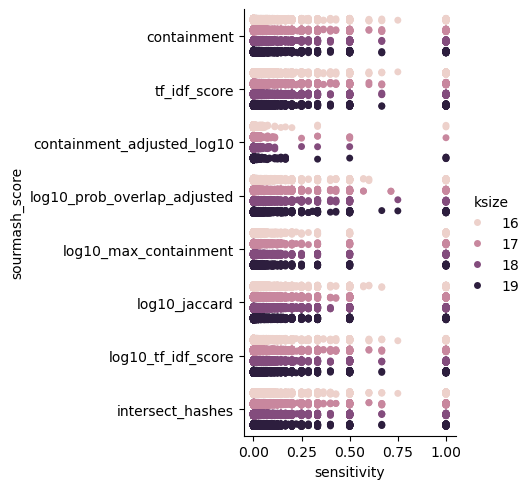

In [10]:
sns.catplot(
    y="sourmash_score", x="sensitivity", data=sensitivity_gr0, hue="ksize", dodge=True
)

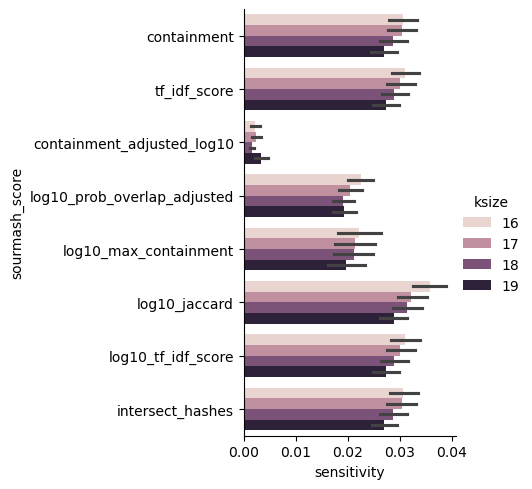

In [11]:
sns.catplot(
    y="sourmash_score",
    x="sensitivity",
    data=sensitivity_gr0,
    hue="ksize",
    dodge=True,
    kind="bar",
)

In [12]:
sensitivity_gr0["sourmash_score"].value_counts(sort=True)

sourmash_score,count
str,u32
"""log10_jaccard""",27614
"""containment""",27362
"""intersect_hashes""",27362
"""log10_tf_idf_score""",27234
"""tf_idf_score""",27233
"""log10_prob_overlap_adjusted""",22929
"""containment_adjusted_log10""",14554
"""log10_max_containment""",11133


In [13]:
sensitivity_gr0["query_class"].value_counts(sort=True)

query_class,count
cat,u32
"""c""",54648
"""d""",44389
"""b""",37521
"""a""",32415
"""g""",8768
"""f""",3985
"""e""",3695


In [14]:
sensitivity_gr0["query_family"].value_counts(sort=True)

query_family,count
cat,u32
"""c.2.1.0""",2412
"""c.94.1.0""",1637
"""c.47.1.0""",1506
"""b.1.1.0""",1497
"""c.37.1.0""",1311
…,…
"""a.48.1.0""",5
"""c.56.5.8""",5
"""e.38.1.1""",5


In [15]:
sensitivity_gr0.filter(pl.col("query_family") == "c.2.1.0")

query_scop_id,lineage,sensitivity,sensitivity_rank,sourmash_score,moltype,ksize,query_name,query_family,query_superfamily,query_fold,query_class,n_family,n_superfamily,n_fold,n_class
str,str,f64,u32,str,str,i32,str,cat,cat,cat,cat,i64,i64,i64,i64
"""d4z0ta_""","""family""",1.0,26,"""containment""","""hp""",16,"""d4z0ta_ c.2.1.0 (A:) automated…","""c.2.1.0""","""c.2.1""","""c.2""","""c""",196,372,372,4463
"""d4dlla1""","""family""",1.0,43,"""containment""","""hp""",16,"""d4dlla1 c.2.1.0 (A:29-190) aut…","""c.2.1.0""","""c.2.1""","""c.2""","""c""",196,372,372,4463
"""d5g4ka_""","""family""",0.333333,165,"""containment""","""hp""",16,"""d5g4ka_ c.2.1.0 (A:) automated…","""c.2.1.0""","""c.2.1""","""c.2""","""c""",196,372,372,4463
"""d5u4qa1""","""family""",0.285714,183,"""containment""","""hp""",16,"""d5u4qa1 c.2.1.0 (A:1-334) auto…","""c.2.1.0""","""c.2.1""","""c.2""","""c""",196,372,372,4463
"""d5ilga1""","""family""",0.142857,308,"""containment""","""hp""",16,"""d5ilga1 c.2.1.0 (A:2-261) auto…","""c.2.1.0""","""c.2.1""","""c.2""","""c""",196,372,372,4463
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""d3tn7a_""","""family""",0.000224,6443,"""intersect_hashes""","""hp""",19,"""d3tn7a_ c.2.1.0 (A:) automated…","""c.2.1.0""","""c.2.1""","""c.2""","""c""",196,372,372,4463
"""d3tjra_""","""family""",0.000224,6726,"""intersect_hashes""","""hp""",19,"""d3tjra_ c.2.1.0 (A:) automated…","""c.2.1.0""","""c.2.1""","""c.2""","""c""",196,372,372,4463
"""d4g81a_""","""family""",0.000224,6815,"""intersect_hashes""","""hp""",19,"""d4g81a_ c.2.1.0 (A:) automated…","""c.2.1.0""","""c.2.1""","""c.2""","""c""",196,372,372,4463


In [16]:
sensitivity.filter((pl.col('sensitivity') > 0.5) & (pl.col('n_family') > 5) &

query_scop_id,lineage,sensitivity,sensitivity_rank,sourmash_score,moltype,ksize,query_name,query_family,query_superfamily,query_fold,query_class,n_family,n_superfamily,n_fold,n_class
str,str,f64,u32,str,str,i32,str,cat,cat,cat,cat,i64,i64,i64,i64
"""d4fvda_""","""family""",1.0,1,"""containment""","""hp""",16,"""d4fvda_ b.47.1.0 (A:) automate…","""b.47.1.0""","""b.47.1""","""b.47""","""b""",11,56,56,3059
"""d5it6a_""","""family""",1.0,2,"""containment""","""hp""",16,"""d5it6a_ b.29.1.0 (A:) automate…","""b.29.1.0""","""b.29.1""","""b.29""","""b""",42,99,99,3059
"""d2bjxa_""","""family""",1.0,4,"""containment""","""hp""",16,"""d2bjxa_ c.47.1.2 (A:) Protein …","""c.47.1.2""","""c.47.1""","""c.47""","""c""",8,215,216,4463
"""d1iqqa_""","""family""",1.0,6,"""containment""","""hp""",16,"""d1iqqa_ d.124.1.1 (A:) S3-RNas…","""d.124.1.1""","""d.124.1""","""d.124""","""d""",7,8,8,3653
"""d4dvqa_""","""family""",1.0,10,"""containment""","""hp""",16,"""d4dvqa_ a.104.1.0 (A:) automat…","""a.104.1.0""","""a.104.1""","""a.104""","""a""",61,73,73,2644
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""d2ct4a1""","""family""",1.0,46,"""intersect_hashes""","""hp""",19,"""d2ct4a1 b.34.2.0 (A:8-64) auto…","""b.34.2.0""","""b.34.2""","""b.34""","""b""",41,71,179,3059
"""d1jpma1""","""family""",1.0,48,"""intersect_hashes""","""hp""",19,"""d1jpma1 c.1.11.2 (A:126-359) L…","""c.1.11.2""","""c.1.11""","""c.1""","""c""",11,43,533,4463
"""d4paka1""","""family""",1.0,49,"""intersect_hashes""","""hp""",19,"""d4paka1 c.94.1.0 (A:33-335) au…","""c.94.1.0""","""c.94.1""","""c.94""","""c""",132,187,187,4463


In [49]:
sensitivity_family = sensitivity.filter(pl.col("lineage") == "family")
sensitivity_family

query_scop_id,lineage,sensitivity,sensitivity_rank,sourmash_score,moltype,ksize,query_name,query_family,query_superfamily,query_fold,query_class,n_family,n_superfamily,n_fold,n_class
str,str,f64,u32,str,str,i32,str,cat,cat,cat,cat,i64,i64,i64,i64
"""d4fvda_""","""family""",1.0,1,"""containment""","""hp""",16,"""d4fvda_ b.47.1.0 (A:) automate…","""b.47.1.0""","""b.47.1""","""b.47""","""b""",11,56,56,3059
"""d5it6a_""","""family""",1.0,2,"""containment""","""hp""",16,"""d5it6a_ b.29.1.0 (A:) automate…","""b.29.1.0""","""b.29.1""","""b.29""","""b""",42,99,99,3059
"""d2a9da2""","""family""",1.0,3,"""containment""","""hp""",16,"""d2a9da2 d.176.1.1 (A:95-343) S…","""d.176.1.1""","""d.176.1""","""d.176""","""d""",2,2,2,3653
"""d2bjxa_""","""family""",1.0,4,"""containment""","""hp""",16,"""d2bjxa_ c.47.1.2 (A:) Protein …","""c.47.1.2""","""c.47.1""","""c.47""","""c""",8,215,216,4463
"""d2b97a_""","""family""",1.0,5,"""containment""","""hp""",16,"""d2b97a_ b.138.1.1 (A:) Hydroph…","""b.138.1.1""","""b.138.1""","""b.138""","""b""",1,2,2,3059
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""d1w2la_""","""family""",0.0,15170,"""intersect_hashes""","""hp""",19,"""d1w2la_ a.3.1.0 (A:) automated…","""a.3.1.0""","""a.3.1""","""a.3""","""a""",12,44,44,2644
"""d1l8qa1""","""family""",0.0,15171,"""intersect_hashes""","""hp""",19,"""d1l8qa1 a.4.12.2 (A:290-399) C…","""a.4.12.2""","""a.4.12""","""a.4""","""a""",2,4,425,2644
"""d1um8a_""","""family""",0.0,15172,"""intersect_hashes""","""hp""",19,"""d1um8a_ c.37.1.20 (A:) ClpX {H…","""c.37.1.20""","""c.37.1""","""c.37""","""c""",30,344,344,4463


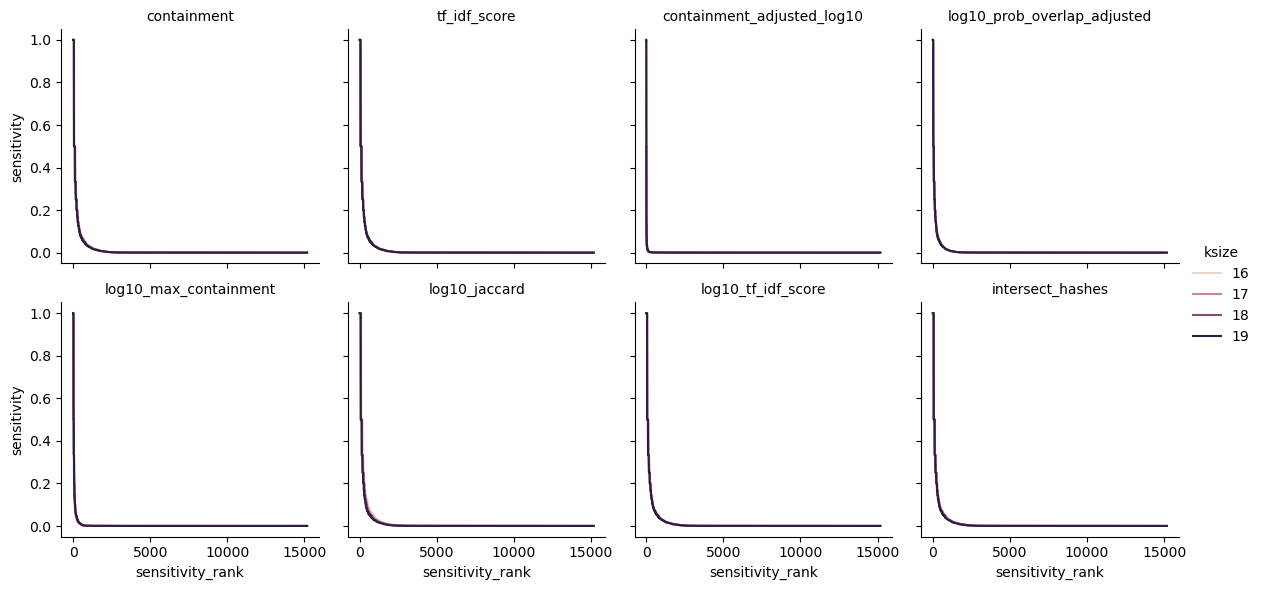

In [50]:
g = sns.relplot(
    data=sensitivity_family,
    col="sourmash_score",
    hue="ksize",
    y="sensitivity",
    x="sensitivity_rank",
    col_wrap=4,
    height=3,
    kind="line",
)
g.set_titles("{col_name}")

## Make catplots

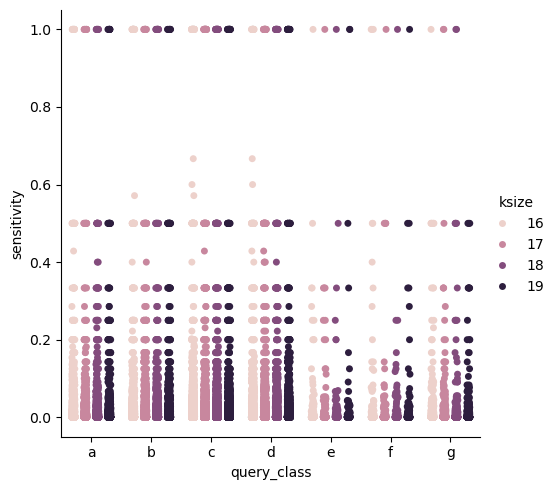

In [54]:
g = sns.catplot(
    data=sensitivity_gr0.filter(pl.col("sourmash_score") == "log10_jaccard"),
    hue="ksize",
    y="sensitivity",
    x="query_class",
    dodge=True,
    # col_wrap=4,
    # height=3,
    # kind="line",
)
g.set_titles("{col_name}")

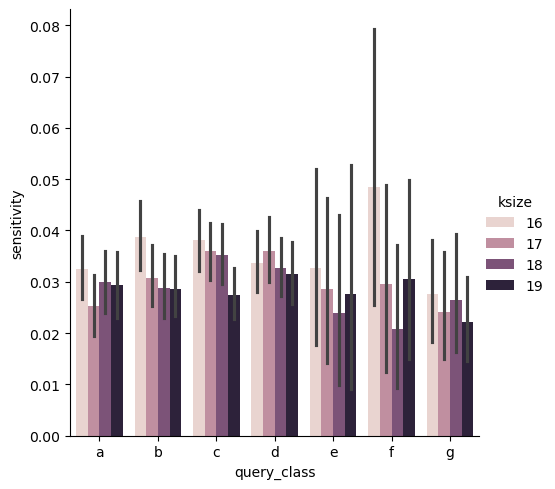

In [55]:
g = sns.catplot(
    data=sensitivity_gr0.filter(pl.col("sourmash_score") == "log10_jaccard"),
    hue="ksize",
    y="sensitivity",
    x="query_class",
    dodge=True,
    kind="bar",
    # col_wrap=4,
    # height=3,
    # kind="line",
)
g.set_titles("{col_name}")

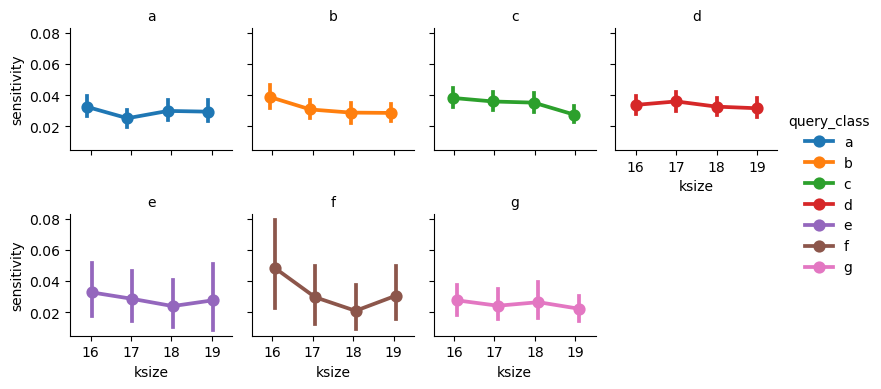

In [59]:
g = sns.catplot(
    data=sensitivity_gr0.filter(pl.col("sourmash_score") == "log10_jaccard"),
    x="ksize",
    y="sensitivity",
    hue="query_class",
    dodge=True,
    kind="point",
    col="query_class",
    col_wrap=4,
    height=2,
    # kind="line",
)
g.set_titles("{col_name}")

In [62]:
sensitivity_gr0_f_16 = sensitivity_gr0.filter(
    (pl.col("query_class") == "f") & (pl.col("ksize") == 16)
)
sensitivity_gr0_f_16

query_scop_id,lineage,sensitivity,sensitivity_rank,sourmash_score,moltype,ksize,query_name,query_family,query_superfamily,query_fold,query_class,n_family,n_superfamily,n_fold,n_class
str,str,f64,u32,str,str,i32,str,cat,cat,cat,cat,i64,i64,i64,i64
"""d1i5pa3""","""family""",1.0,18,"""containment""","""hp""",16,"""d1i5pa3 f.1.3.1 (A:1-263) delt…","""f.1.3.1""","""f.1.3""","""f.1""","""f""",2,3,20,332
"""d4wwxb3""","""family""",0.5,67,"""containment""","""hp""",16,"""d4wwxb3 f.66.1.1 (B:791-957) R…","""f.66.1.1""","""f.66.1""","""f.66""","""f""",1,2,2,332
"""d4dxwa_""","""family""",0.5,99,"""containment""","""hp""",16,"""d4dxwa_ f.14.1.0 (A:) automate…","""f.14.1.0""","""f.14.1""","""f.14""","""f""",2,13,14,332
"""d5y5sh1""","""family""",0.285714,182,"""containment""","""hp""",16,"""d5y5sh1 f.23.10.0 (H:5-43) aut…","""f.23.10.0""","""f.23.10""","""f.23""","""f""",1,3,56,332
"""d2qkga1""","""family""",0.25,198,"""containment""","""hp""",16,"""d2qkga1 f.1.3.0 (A:1-228) auto…","""f.1.3.0""","""f.1.3""","""f.1""","""f""",1,3,20,332
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""d5b5ej_""","""family""",0.000224,6371,"""intersect_hashes""","""hp""",16,"""d5b5ej_ f.23.32.1 (j:) automat…","""f.23.32.1""","""f.23.32""","""f.23""","""f""",1,1,56,332
"""d3hola2""","""family""",0.000224,6401,"""intersect_hashes""","""hp""",16,"""d3hola2 f.4.1.3 (A:385-528) Tr…","""f.4.1.3""","""f.4.1""","""f.4""","""f""",2,8,37,332
"""d7cohl_""","""family""",0.000224,6441,"""intersect_hashes""","""hp""",16,"""d7cohl_ f.23.6.1 (L:) Mitochon…","""f.23.6.1""","""f.23.6""","""f.23""","""f""",1,1,56,332


In [76]:
sensitivity_gr0_f_16.filter(pl.col("sensitivity") > 0.5)

query_scop_id,lineage,sensitivity,sensitivity_rank,sourmash_score,moltype,ksize,query_name,query_family,query_superfamily,query_fold,query_class,n_family,n_superfamily,n_fold,n_class
str,str,f64,u32,str,str,i32,str,cat,cat,cat,cat,i64,i64,i64,i64
"""d1i5pa3""","""family""",1.0,18,"""containment""","""hp""",16,"""d1i5pa3 f.1.3.1 (A:1-263) delt…","""f.1.3.1""","""f.1.3""","""f.1""","""f""",2,3,20,332
"""d6rhvh_""","""family""",1.0,16,"""tf_idf_score""","""hp""",16,"""d6rhvh_ f.6.1.0 (H:) automated…","""f.6.1.0""","""f.6.1""","""f.6""","""f""",4,7,7,332
"""d1ddba_""","""family""",1.0,6,"""log10_prob_overlap_adjusted""","""hp""",16,"""d1ddba_ f.1.4.1 (A:) Proapopto…","""f.1.4.1""","""f.1.4""","""f.1""","""f""",7,13,20,332
"""d3jbra3""","""family""",1.0,16,"""log10_prob_overlap_adjusted""","""hp""",16,"""d3jbra3 f.14.1.2 (A:1103-1395)…","""f.14.1.2""","""f.14.1""","""f.14""","""f""",5,13,14,332
"""d2bs2c_""","""family""",1.0,24,"""log10_prob_overlap_adjusted""","""hp""",16,"""d2bs2c_ f.21.2.1 (C:) automate…","""f.21.2.1""","""f.21.2""","""f.21""","""f""",1,7,11,332
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""d4hyja_""","""family""",1.0,12,"""log10_jaccard""","""hp""",16,"""d4hyja_ f.13.1.0 (A:) automate…","""f.13.1.0""","""f.13.1""","""f.13""","""f""",13,20,20,332
"""d6tk6a_""","""family""",1.0,24,"""log10_jaccard""","""hp""",16,"""d6tk6a_ f.13.1.0 (A:) automate…","""f.13.1.0""","""f.13.1""","""f.13""","""f""",13,20,20,332
"""d7jgwa1""","""family""",1.0,73,"""log10_jaccard""","""hp""",16,"""d7jgwa1 f.1.4.1 (A:1-196) Apop…","""f.1.4.1""","""f.1.4""","""f.1""","""f""",7,13,20,332


In [71]:
sensitivity_gr0_f_16["query_fold"].value_counts(sort=True).head()

query_fold,count
cat,u32
"""f.23""",174
"""f.4""",110
"""f.1""",65
"""f.13""",58
"""f.17""",39


In [72]:
sensitivity_gr0_f_16["query_superfamily"].value_counts(sort=True).head()

query_superfamily,count
cat,u32
"""f.13.1""",58
"""f.4.3""",46
"""f.1.4""",43
"""f.14.1""",33
"""f.4.1""",26


In [73]:
sensitivity_gr0_f_16["query_family"].value_counts(sort=True).head()

query_family,count
cat,u32
"""f.13.1.0""",38
"""f.1.4.1""",27
"""f.4.3.0""",19
"""f.21.2.2""",18
"""f.19.1.0""",17
